1)
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [4]:
months = np.arange(12)
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

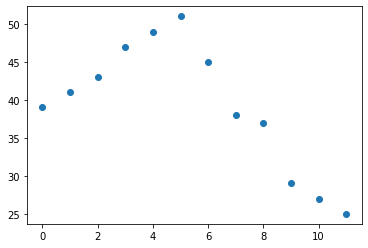

In [5]:
plt.scatter(months,max_temp)

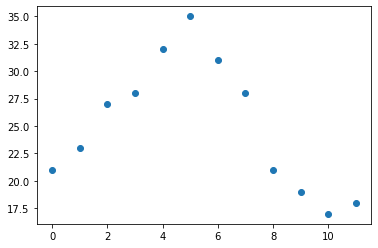

In [6]:
plt.scatter(months,min_temp)

Text(0, 0.5, 'Temperature ($^\\circ$C)')

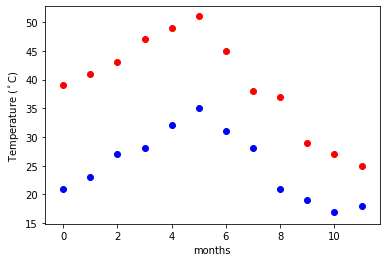

In [7]:
plt.scatter(months,max_temp,color='red')
plt.scatter(months,min_temp,color='blue')
plt.xlabel('months')
plt.ylabel('Temperature ($^\circ$C)')

In [8]:
temp_max=max_temp
temp_min=min_temp
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

In [10]:
res_max

array([ 39.88861734, -10.59083168,   1.33370154])

In [11]:
res_min

array([25.55626462, -7.74472963,  0.93101294])

In [12]:
cov_max

array([[ 1.28972691, -0.14357417, -0.02263923],
       [-0.14357417,  2.57009605, -0.032763  ],
       [-0.02263923, -0.032763  ,  0.07074015]])

In [13]:
cov_min

array([[ 0.19941393, -0.02644226, -0.00351662],
       [-0.02644226,  0.38392583, -0.00606194],
       [-0.00351662, -0.00606194,  0.02114122]])

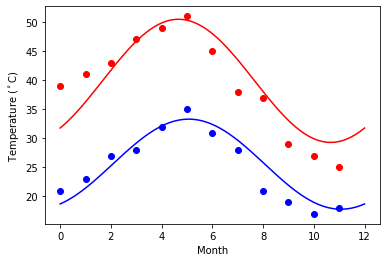

In [14]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

2)
Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [15]:
import pandas as pd

In [16]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [17]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [19]:
sex_cnt=titanic.sex.value_counts()
sex_cnt

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2c9c98f7bc8>,
 [Text(-0.5289204494303963, 1.0882753135922674, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')])

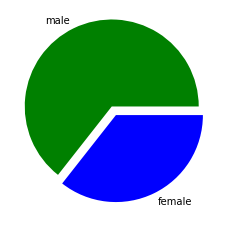

In [29]:
plt.pie(sex_cnt,labels=['male','female'],colors=['green','blue'],explode=[0.11,0])

insight: males are more than females according to pie chart

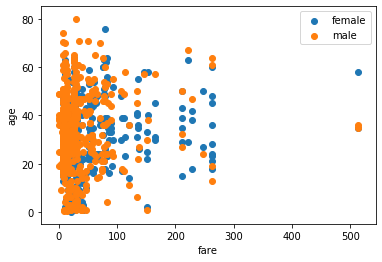

In [30]:
gby_sex = titanic.groupby('sex')
for name,group in gby_sex:
    #print(name)
    #print(group)
    plt.scatter(x=group['fare'],y=group['age'],label=name)
    plt.xlabel("fare")
    plt.ylabel("age")
    plt.legend()

insight :
1)most of fare paid is between 0 to 100 range and in that, most proportion is paid by males than females 
2) the min and max age can be seen from the plot (between 0 and 80)
3) the min and max fare can also be seen from plot (between 0 and < 520)